# SVM

In [1]:
%run "00-common"
%matplotlib inline

import sklearn as sk                        # Llibreia de DM
import sklearn.datasets as ds               # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv        # Pel Cross-validation
import sklearn.neighbors as nb              # Per fer servir el knn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC, LinearSVC

In [2]:
df = pd.read_csv('../feature_selection.csv')

In [3]:
df.describe()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_duration_err1,koi_duration_err2,koi_depth,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,dec,koi_disposition
count,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000
mean,59.351876,2.239946e-03,-2.239946e-03,0.009407,-0.009407,0.783689,0.324935,-0.324935,29135.346866,158.929694,14.474332,-55.679692,1141.621123,1.555687e+04,5.870904e+03,-7.222022e+03,324.363644,5726.816126,146.456937,-165.488581,0.120550,-0.145107,1.990044,0.396500,43.833755,0.3195
std,121.129254,8.611826e-03,8.611826e-03,0.024766,0.024766,3.603553,0.625687,0.625687,82536.959041,3913.099735,182.876455,1669.877283,945.831969,2.854121e+05,9.228258e+04,1.340305e+05,856.894060,784.601670,46.093265,85.753596,0.128979,0.080289,7.682017,1.290065,3.606978,0.4664
min,0.241843,2.100000e-08,-1.497000e-01,0.000016,-0.569000,0.001000,0.000000,-8.100000,0.800000,0.080000,0.000000,-72650.000000,101.000000,3.000000e-02,0.000000e+00,-5.362422e+06,0.000000,2900.000000,0.000000,-1762.000000,0.000000,-0.856000,0.132000,0.000000,36.678841,0.0000
25%,2.350017,4.351000e-06,-3.180250e-04,0.001008,-0.008911,0.228725,0.041925,-0.318736,190.350000,1.567500,0.260000,-3.475000,564.000000,2.395750e+01,1.100750e+01,-5.027050e+02,15.100000,5345.750000,111.000000,-198.000000,0.045000,-0.196000,0.844750,0.143000,40.813760,0.0000
50%,9.053349,2.674500e-05,-2.674500e-05,0.003575,-0.003575,0.578500,0.124000,-0.124000,520.800000,2.760000,0.640000,-0.370000,941.500000,1.834850e+02,9.683000e+01,-5.279500e+01,31.450000,5766.000000,156.000000,-164.975956,0.074000,-0.142696,1.006000,0.274000,43.665195,0.0000
75%,38.167180,3.180250e-04,-4.351000e-06,0.008911,-0.001008,0.885250,0.318736,-0.041925,5582.700000,31.140000,6.057500,-0.150000,1453.000000,1.542845e+03,9.491600e+02,-5.755000e+00,163.950000,6109.250000,174.250000,-119.000000,0.137000,-0.095000,1.413500,0.372944,46.813511,1.0000
max,1071.232624,1.497000e-01,-2.100000e-08,0.569000,-0.000016,100.806000,8.100000,0.000000,907420.000000,161858.000000,5884.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,11360.000000,595.000000,0.000000,0.998000,0.000000,162.725000,33.091000,52.220341,1.0000


In [4]:
y = df['koi_disposition'].values
X = df.drop('koi_disposition', axis=1).values.astype('float32')

Separate the data (30% test)

In [5]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, stratify = y, random_state=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

# Apply the normalization trained in training data in both training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear

In [7]:
#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred = knc.predict(X_test)

print("Confusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[387  21]
 [ 54 138]]

Accuracy on test set:  0.875


In [8]:
# List of C values to test. We usualy test diverse orders of magnitude
Cs = np.logspace(-3, 6, num=10, base=10.0)
#Cs = np.logspace(-3, 5, num=9, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']

Acc. 5-fold cross on train data=  0.854908130675442


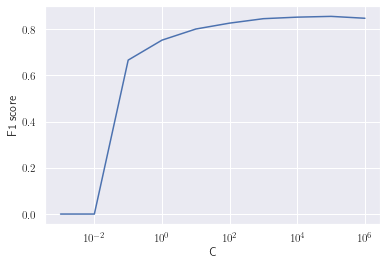

In [9]:
plt.semilogx(Cs,scores)
plt.ylabel('F1 score')
plt.xlabel('C')
plt.savefig('../figures/svm_linear_C_cv.pdf')

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=5, scoring='f1', n_jobs=-1)
print('F1 score 5-fold cross on train data= ', cvacc.mean())

# Let's apply the best C parameter found to the test set

In [10]:
#knc = LinearSVC(C=parval['C']) 
svcl = SVC(C=parval['C'], kernel='linear')
svcl.fit(X_train, y_train)
pred = svcl.predict(X_test)

print("\nConfusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))
print("\nF1 score on test set: ", sk.metrics.f1_score(y_test, pred))
print("\nBest value of parameter C found: ", parval)
print("\nNumber of supports: ", np.sum(svcl.n_support_), "(",np.sum(np.abs(svcl.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ", np.sum(svcl.n_support_)/X_train.shape[0])


Confusion matrix on test set:
 [[383  25]
 [ 26 166]]

Accuracy on test set:  0.915
\F1 score on test set:  0.8668407310704961

Best value of parameter C found:  {'C': 100000.0}

Number of supports:  288 ( 269 of them have slacks)
Prop. of supports:  0.2057142857142857


## Poly

In [11]:
svcp2 = SVC(kernel='poly', degree=2) 
svcp2.fit(X_train, y_train)

pred = svcp2.predict(X_test)
print("Confusion matrix on test set:\n",sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sk.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[383  25]
 [ 61 131]]

Accuracy on test set:  0.8566666666666667


In [12]:
Cs = np.logspace(-3, 6, num=10, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly', degree=2) , param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']

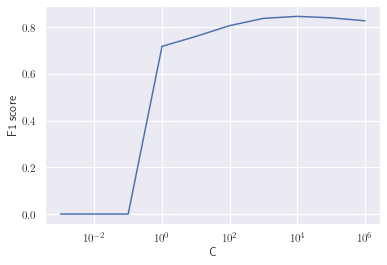

In [13]:
plt.semilogx(Cs,scores)
plt.ylabel('F1 score')
plt.xlabel('C')
plt.savefig('../figures/svm_poly_C_cv.pdf')

In [14]:
parval = grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly', degree=2, C=parval['C']) , X=X_train,  y=y_train, cv=5, scoring='f1', n_jobs=-1)
print('F1 score 5-fold cross on train data= ', cvacc.mean())

svcp2 = SVC(kernel='poly', degree=2, C=parval['C']) 
svcp2.fit(X_train, y_train)
pred = svcp2.predict(X_test)

Acc. 5-fold cross on train data=  0.8464941662682148


In [15]:
print("\nConfusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))
print("\nF1 score on test set: ", sk.metrics.f1_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(svcp2.n_support_), "(",np.sum(np.abs(svcp2.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(svcp2.n_support_)/X_train.shape[0])


Confusion matrix on test set:
 [[380  28]
 [ 28 164]]

Accuracy on test set:  0.9066666666666666
\F1 score on test set:  0.8541666666666666

Best combination of parameters found:  {'C': 10000.0}

Number of supports:  332 ( 283 of them have slacks)
Prop. of supports:  0.23714285714285716


## Poly3

In [16]:
svcp3 = SVC(kernel='poly', degree=3) 
svcp3.fit(X_train, y_train)
pred = svcp3.predict(X_test)

print("Confusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[387  21]
 [ 56 136]]

Accuracy on test set:  0.8716666666666667


In [17]:
Cs = np.logspace(-3, 6, num=10, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly', degree=3) , param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

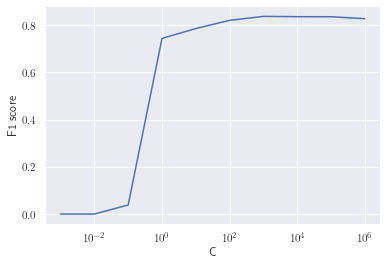

In [18]:
plt.semilogx(Cs, scores)
plt.ylabel('F1 score')
plt.xlabel('C')
plt.savefig('../figures/svm_poly3_C_cv.pdf')

In [19]:
parval = grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly', degree=3, C=parval['C']) , X=X_train,  y=y_train, cv=5, scoring='f1', n_jobs=-1)
print('F1 score 5-fold cross on train data= ', cvacc.mean())

svcp3 = SVC(kernel='poly', degree=3, C=parval['C']) 
svcp3.fit(X_train, y_train)
pred = svcp3.predict(X_test)

Acc. 5-fold cross on train data=  0.8372648250478765


In [20]:
print("\nConfusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))
print("\nF1 score on test set: ", sk.metrics.f1_score(y_test, pred))
print("\nBest combination of parameters found: ", parval)
print("\nNumber of supports: ",np.sum(svcp3.n_support_), "(",np.sum(np.abs(svcp3.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(svcp3.n_support_)/X_train.shape[0])


Confusion matrix on test set:
 [[381  27]
 [ 30 162]]

Accuracy on test set:  0.905
\F1 score on test set:  0.8503937007874015

Best combination of parameters found:  {'C': 1000.0}

Number of supports:  356 ( 317 of them have slacks)
Prop. of supports:  0.2542857142857143


## RBF Kernel

In [21]:
svcrbf = SVC() 
svcrbf.fit(X_train, y_train)
pred = svcrbf.predict(X_test)
print("Confusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[383  25]
 [ 65 127]]

Accuracy on test set:  0.85


In [22]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))


Best combination of parameters found:  {'C': 1000000.0, 'gamma': 0.001}

Acc. 5-fold cross on train data=  0.8497717909829922


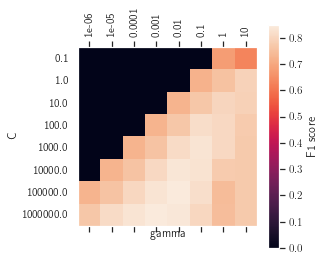

In [23]:
plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar(label='F1 score')
plt.grid(b=None)
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.savefig("../figures/svm_rbf_C_cv.pdf")

parval = grid_search.best_params_
print("\nBest combination of parameters found: ", parval)

cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=5, scoring='f1', n_jobs=-1)
print('\nF1 score 5-fold cross on train data= ', cvacc.mean())

In [24]:
svcrbf = SVC(C=parval['C'], gamma=parval['gamma']) 
svcrbf.fit(X_train, y_train)
pred = svcrbf.predict(X_test)

print("Confusion matrix on test set:\n", sk.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))
print("\nF1 score on test set: ", sk.metrics.f1_score(y_test, pred))
print("\nNumber of supports: ",np.sum(svcrbf.n_support_), "(",np.sum(np.abs(svcrbf.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(svcrbf.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[381  27]
 [ 28 164]]

Accuracy on test set:  0.9083333333333333

F1 score on test set:  0.8563968668407309

Number of supports:  330 ( 302 of them have slacks)
Prop. of supports:  0.2357142857142857


In [25]:
import pickle

with open('pickles/svm_lineal.pkl', 'wb') as out:
    pickle.dump(svcl, out)
    
with open('pickles/svm_poly2.pkl', 'wb') as out:
    pickle.dump(svcp2, out)
    
with open('pickles/svm_poly3.pkl', 'wb') as out:
    pickle.dump(svcp3, out)

with open('pickles/svm_rbf.pkl', 'wb') as out:
    pickle.dump(svcrbf, out)